## Avocado Price Prediction 
Average Price Prediction using Linear Regression and Random forest Regressor

### Name:Elias Tadele
### ID_Number :13776
### submitted to Temesgen

## Table of Contents

1. [1.Select title](#section0)<br>
2. [1. Problem Statement](#section1)<br>
3. [definition of problem](#section3) <br>
4. [Data Analysis](#section4) 
    - 4.1 [Spread of Average Price in the data](#section401)<br/>
    - 4.2 [Type of avocado vs Average price](#section402)<br/>
    - 4.3 [How Average price varies over years](#section403)<br/>
    - 4.4 [How Average price varies across regions](#section404)<br/>
6. [Predicting Average Price of Avocado](#section6)
    - 6.1 [Using Linear Regression model 1](#section601)<br>
    - 6.2 [Model Evaluation for Linear Regression model 1 ](#section602)<br> 
    - 6.3 [Using Linear Regression model 2](#section603)<br>
    - 6.4 [Model Evaluation for Linear Regression model 2](#section604)<br> 
    - 6.5 [Using Random forest Regressor](#section605)<br>
    - 6.6 [Model Evaluation for Random forest Regressor](#section606)<br> 
7. [Conclusion](#section7)<br>  


### 1.Select title Avocado Price predection<a class="anchor" id="section0">

### 1. Problem Statement <a class="anchor" id="section1">

The goal is to __predict Average price__ of avocado using best regression model

### 2. Data Loading and image taken from Jinka <a class="anchor" id="section2">

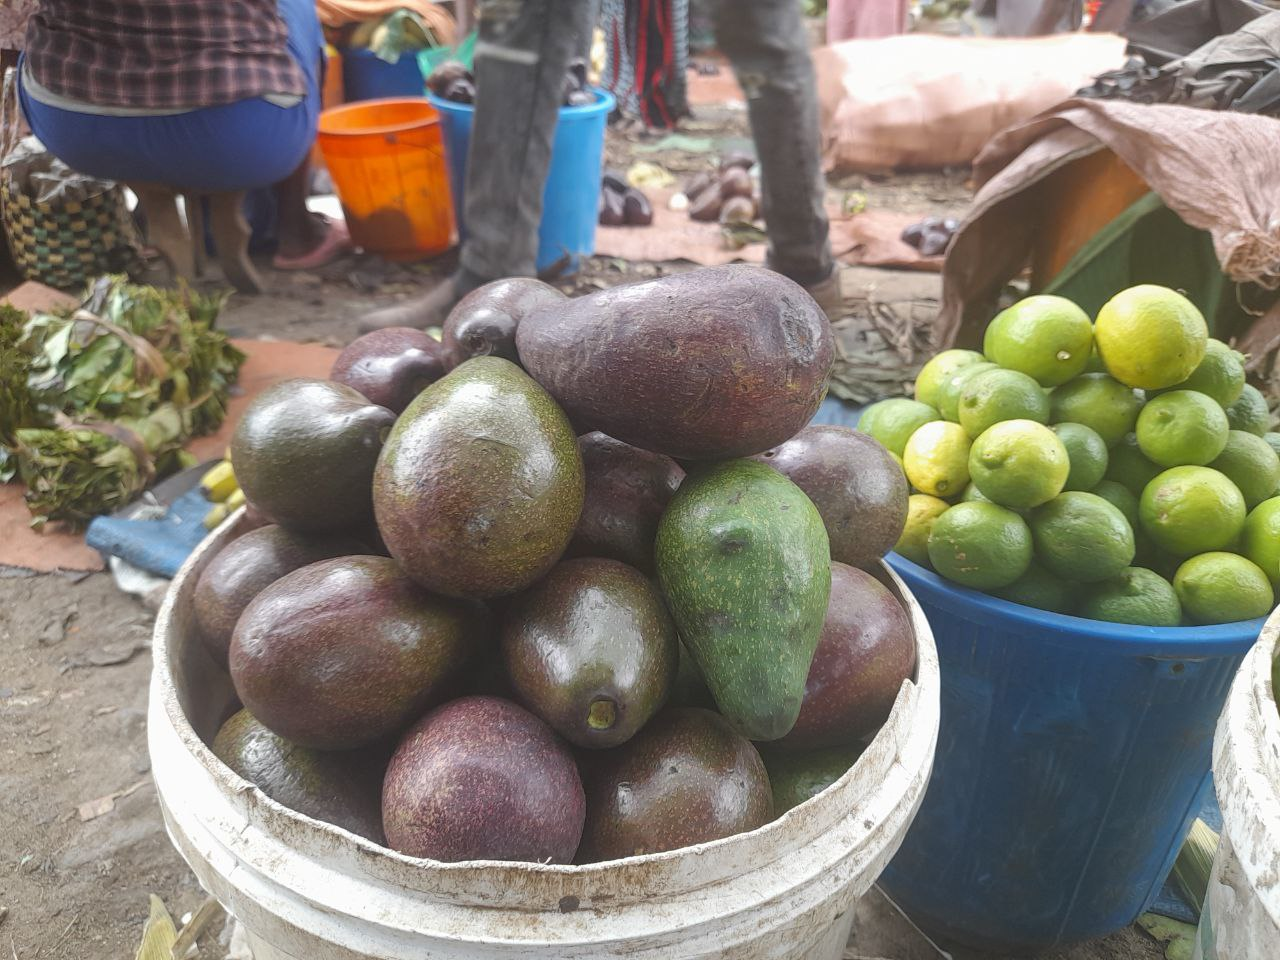

### Definition of problem<a class="anchor" id="section3">
Avocado is a fruit that belongs to the berry family. It comes from the avocado tree, scientifically known as Persea americana. The fruit is native to south-central Mexico but is now grown in various parts of the world with suitable climates. Avocados are known for their creamy texture and unique, nutty flavor.

Avocados have gained popularity for their potential health benefits and versatility in both savory and sweet dishes. They are a staple in many cuisines and have become a trendy and beloved ingredient in modern, healthy eating.

#### Importing packages  tools                                        

In [5]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from subprocess import check_output
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



#### Importing the Dataset

In [8]:
import os
avocado = pd.read_csv("avocado.csv")
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## 3. Preprocessing the data <a class="anchor" id="section3">

 - Creating Dummy variables for __Type__ column
 - Use label encoder for __region__ column to convert it into numerical data
 - Dropping the column __Unnamed__ as it has only index values.
 - Renaming column 4046,4225,4770 for better understanding    

In [9]:
avocado.shape

(18249, 14)

18249 rows with 14 columns

In [10]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


The dataset has no missing values

In [11]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


The average price of avocado is 1.405 and minimum 0.44 maximum is 3.25

In [12]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [13]:
avocado.drop("Unnamed: 0", axis=1,inplace=True) #dropping the column as it pnly contains index

In [14]:
#renaming columns for better understanding
avocado.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'}, 
                 inplace=True)

In [15]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [16]:
avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

There are two types of avocado - __conventional and organic__

Creating dummy variables for type column

In [17]:
avocado = pd.get_dummies(avocado, columns=['type'],drop_first=True)
avocado.head()

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,False
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,False
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,False
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,False
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,False


In [18]:
print("Organic ",avocado[avocado["type_organic"]==1]["Date"].count())
print("conventional ",avocado[avocado["type_organic"]==0]["Date"].count())

Organic  9123
conventional  9126


Establishing __coorelation__ between all the features using __heatmap__.

In [20]:
import re

def str_to_float(str_in):
    # Replace , with . and filter out non-numeric values
    new_str = re.sub(r'[^\\d.]', '', str_in.replace(",", "."))
    try:
        my_float = float(new_str)
    except ValueError:
        my_float = 0
    return my_float

# Example usage:
my_str = "30,3"
result = str_to_float(my_str)
print(result)  # Output: 30.3


0


__Average price has more correlation with type of avocado__ and then with year compared to others

Label Encoding "region" column to convert to numerical data

In [21]:
#label encode region

le = LabelEncoder()
avocado['region'] = le.fit_transform(avocado['region'])
avocado.head()

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,False
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,False
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,False
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,False
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,False


In [22]:
avocado.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [24]:
import re

def str_to_float(str_in):
    # Replace , with . and filter out non-numeric values
    new_str = re.sub(r'[^\\d.]', '', str_in.replace(",", "."))
    try:
        my_float = float(new_str)
    except ValueError:
        my_float = 0
    return my_float

# Example usage:
my_str = "30,3"
result = str_to_float(my_str)
print(result)  # Output: 30.3


0


Now we can see some mild correlation with Average price and region

### 4. Data Analysis <a class="anchor" id="section4">

#### 4.1 Spread of Average Price in the data <a class="anchor" id="section401">

C:\Users\Admin\AppData\Local\Temp\ipykernel_70324\3097196595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avocado["AveragePrice"],axlabel="Distribution of average price")
C:\Users\Admin\anaconda3\pkgs\Anavconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Distribution of average price', ylabel='Density'>

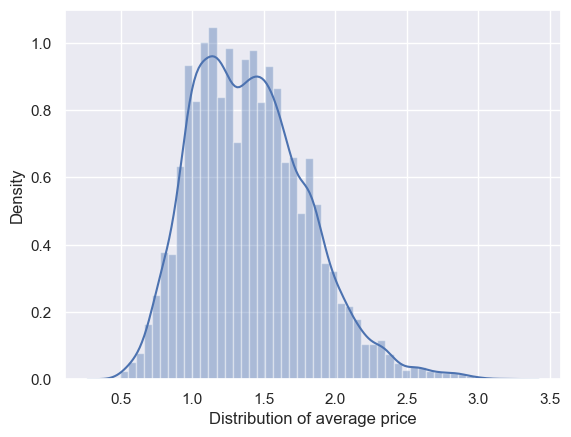

In [25]:
sns.distplot(avocado["AveragePrice"],axlabel="Distribution of average price")

Most Average price lies range from 1.0 to 1.7

#### 4.2 Type of avocado vs Average price <a class="anchor" id="section402">

<Axes: xlabel='type_organic', ylabel='AveragePrice'>

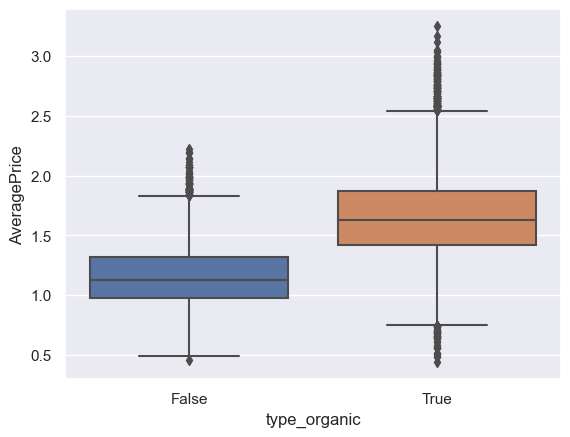

In [26]:
sns.boxplot(x="type_organic", y="AveragePrice", data=avocado)

Organic avocados are more expensive than conventional ones.

#### 4.3 How Average price varies over years <a class="anchor" id="section403">

<Axes: xlabel='year', ylabel='AveragePrice'>

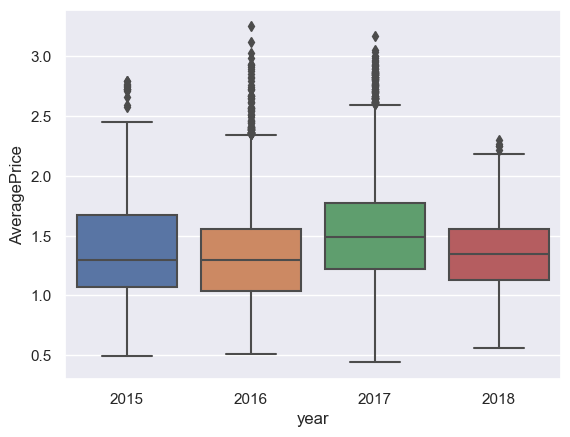

In [27]:
sns.boxplot(x="year", y="AveragePrice", data=avocado)

We notice the average price was high in 2017 compared to other years

#### 4.4 How Average price varies across regions <a class="anchor" id="section404">

<Axes: xlabel='region'>

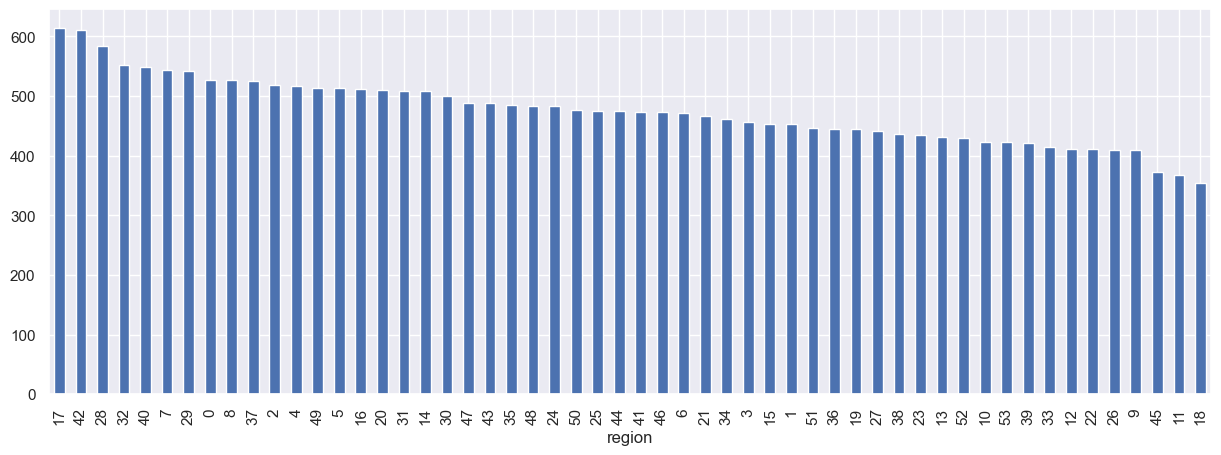

In [28]:
avocado.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

AveragePrice varies with region. Price of avocado varies from one region to another – with HartfordSpringfield being highest and Houston being lowest price to get cheap Avocado.

### 6. Predicting Average Price of Avocado    <a class="anchor" id="section6">

#### 6.1 Using Linear Regression - Model 1  <a class="anchor" id="section601">

In [29]:
#Creating a new dataframe with few columns only and create train and test data
avocado_new=avocado[["AveragePrice","Total Volume","region","type_organic","Total Bags","year"]]

X=avocado_new[["AveragePrice","Total Volume","region","Total Bags","year"]] #feature columns
y=avocado_new.type_organic #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

scaler = StandardScaler().fit(avocado_new)
avocado_new_std = scaler.transform(avocado_new)
avocado_new = pd.DataFrame(avocado_new_std)
avocado_new.columns = ['AveragePrice', 'Total Volume', "region",'type_organic','Total Bags', 'year']
avocado_new.head()

X Train Shape  (14599, 5)
Y Train Shape  (14599,)
X Test Shape  (3650, 5)
Y Test Shape  (3650,)


,AveragePrice,Total Volume,region,type_organic,Total Bags,year
0,-0.188689,-0.227716,-1.700252,-0.999836,-0.234170,-1.221282
1,-0.139020,-0.230427,-1.700252,-0.999836,-0.233350,-1.221282
2,-1.182069,-0.212085,-1.700252,-0.999836,-0.234730,-1.221282
3,-0.809551,-0.223444,-1.700252,-0.999836,-0.237096,-1.221282
4,-0.312861,-0.231538,-1.700252,-0.999836,-0.236718,-1.221282


In [30]:
feature_cols = ['Total Volume', "region",'type_organic','Total Bags', 'year']                # create a Python list of feature names
X = avocado_new[feature_cols]                                     # use the list to select a subset of the original DataFrame-+
y = avocado_new.AveragePrice


def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)


X_train shape:  (14599, 5)
y_train shape:  (14599,)
X_test shape:  (3650, 5)
y_test shape:  (3650,)


In [31]:
linreg1 = LinearRegression()
linreg1.fit(X_train, y_train) 

feature_cols.insert(0,'Intercept')
coef = linreg1.coef_.tolist()
coef.insert(0, linreg1.intercept_)
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

y_pred_train = linreg1.predict(X_train)
y_pred_test = linreg1.predict(X_test)

Intercept -0.0027265250505232605
Total Volume -0.05424721790222384
region -0.003869933356251232
type_organic 0.6032984224026803
Total Bags 0.0023670606494498223
year 0.09223221926899523


#### 6.2 Model Evaluation for Linear Regression Model 1  <a class="anchor" id="section602">

In [32]:
print("Model Evaluation for Linear Regression Model 1")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = linreg1.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

yhat = linreg1.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model 1
RMSE for training set is 0.7810035858497618  and RMSE for test set is 0.7788188797065335
r_squared for test data  0.38976425151927596  and adjusted_r_squared for test data 0.389555166427629
r_squared for test data  0.39450378819865217  and adjusted_r_squared for test data 0.3936729756138534


#### Adding few more columns to check if accuracy increases

In [33]:
avocado_full=avocado[[ 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']]
avocado_full.head()

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type_organic,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,False,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,False,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,False,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,False,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,False,2015,0


#### 6.3 Linear Regression Model 2 <a class="anchor" id="section603">

In [49]:

scaler = StandardScaler().fit(avocado_full)
avocado_full_std = scaler.transform(avocado_full)
avocado_full = pd.DataFrame(avocado_full_std)
avocado_full.columns = [ 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']

feature_cols = [ 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']                # create a Python list of feature names
X = avocado_full[feature_cols]                                     # use the list to select a subset of the original DataFrame-+

y = avocado_full.AveragePrice


def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)


X_train shape:  (14599, 11)
y_train shape:  (14599,)
X_test shape:  (3650, 11)
y_test shape:  (3650,)


In [50]:

linreg2 = LinearRegression()
linreg2.fit(X_train, y_train) 

feature_cols.insert(0,'Intercept')
coef = linreg2.coef_.tolist()
coef.insert(0, linreg2.intercept_)
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

y_pred_train = linreg2.predict(X_train)
y_pred_test = linreg2.predict(X_test)    

Intercept -0.002350575426538102
Total Volume -517.6834804265006
Small HASS sold 189.31964172790353
Large HASS sold 180.8374371166208
XLarge HASS sold 15.996361634385842
Total Bags 4352.096552705789
Small Bags -3180.85953230142
Large Bags -1040.0915263907198
XLarge Bags -75.34998282414169
type_organic 0.6054455041331669
year 0.09258218687434443
region 0.012235265603907036



#### 6.4 Model Evaluation for Linear Regression model 2 <a class="anchor" id="section604">

In [52]:
from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)
yhat = linreg2.predict(X_train)

SS_Residual = sum((y_train - yhat) ** 2)
SS_Total = sum((y_train - np.mean(y_train)) ** 2)




Accuracy increased by adding more columns

#### Now lets predict using random forest 

#### 6.5 Predict using Random Forest Regressor <a class="anchor" id="section605">

In [53]:
import numpy as np

# Example data (replace with your actual data)
my_data = [1.2, 3.4, 5.6, 7.8]  # Replace with your actual data

# Convert the list to a NumPy array
my_array = np.asarray(my_data, dtype=float)

# Now you can use my_array for further computations


#### 6.6 Model Evaluation for Random Forest Regressor <a class="anchor" id="section606">

In [54]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Example data (replace this with your actual data loading process)
# Ensure X and y are properly loaded as numpy arrays or pandas DataFrames/Series
X = np.random.rand(100, 10)  # Example feature matrix with 100 samples and 10 features
y = np.random.rand(100)  # Example target array with 100 samples

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Initialize the model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Model Evaluation for Random Forest Regressor")
print('RMSE for training set is {}'.format(RMSE_train), 'and RMSE for test set is {}'.format(RMSE_test))

X_train shape: (80, 10)
y_train shape: (80,)
Model Evaluation for Random Forest Regressor
RMSE for training set is 0.11347698764300797 and RMSE for test set is 0.26221799958713093


Random forest model predict average price of avocado better than linear model

### 7. Conclusion  <a class="anchor" id="section7">

- Columns like Type of avocado, Year, Region have impact on Average Price
- Adding few more columns like bags sold and sales of different avocado types helped in predicting Average price more accurately
- Random Forest Regressor model predicts the average price more accurately than linear regression model